In [1]:
import numpy as np
import pandas as pd
import time
import csv

# Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [4]:
test

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.0,265.0,288.0,276.5,2.5,2.5,2.4,2.4,2.4,...,70.567966,70.528762,70.333905,70.245126,70.186665,70.010219,69.916747,69.771722,69.737748,69.601365
2204,TEST_2204,182.0,191.0,262.0,226.5,4.1,4.1,4.1,4.0,4.0,...,66.545938,66.485657,66.408375,66.255137,66.206650,66.079592,65.951010,65.884988,65.719787,65.632342
2205,TEST_2205,254.0,280.0,332.0,306.0,3.8,3.8,3.8,3.7,3.7,...,63.254101,63.134023,63.035379,62.877995,62.681351,62.499735,62.421901,62.417195,62.323963,62.307955
2206,TEST_2206,257.0,285.0,297.0,291.0,4.5,4.4,4.4,4.3,4.3,...,64.331650,64.137868,64.045153,63.944310,63.916583,63.797809,63.762720,63.681733,63.512114,63.343589


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
train.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Columns: 183 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), object(1)
memory usage: 3.1+ MB


## 컬럼 조작

In [8]:
cols = ['id','target','수고','수관폭min','수관폭max','수관폭avg']
for i in range(89):
    cols.append('s{}'.format(i))
for i in range(89):
    cols.append('c{}'.format(i))
len(cols)

184

In [9]:
train.columns=cols
train=train.drop('id', axis=1)
train.head(2)

,target,수고,수관폭min,수관폭max,수관폭avg,s0,s1,s2,s3,s4,...,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88
0,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.29383,70.262422,70.169841,70.043251
1,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.59755,70.565088,70.560502,70.427600


In [10]:
train0=train #original train data

# EDA

In [11]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
import seaborn as sns
from datetime import datetime 

## 착과량(target)

-0.019181543802712243


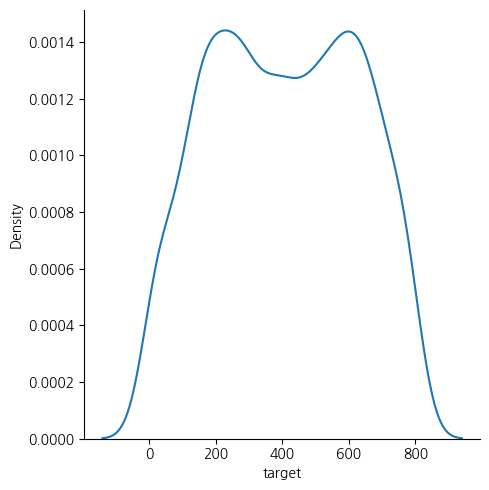

In [12]:
# 착과량 분포
print(train['target'].skew())
sns.displot(data=train, x='target', kind="kde")

In [13]:
train['target'].kurt()

-1.1199286333271075

In [14]:
train['target'].describe()

count    2207.000000
mean      406.222474
std       218.978302
min         1.000000
25%       221.000000
50%       404.000000
75%       593.500000
max       799.000000
Name: target, dtype: float64

In [15]:
train['target'].describe()['25%']

221.0

In [16]:
q1 = train[train['target'] < train['target'].describe()['25%']]
q3 = train[train['target'] > train['target'].describe()['75%']]
q2 = train.loc[list(set(train.index)-set(q3.index)-set(q1.index))]

## 새순, 엽록소 나눠서 보자 (chlorophyll, sprout)

In [17]:
chlorophyll_col = []
sprout_col = []
col_else = []
for col in train.columns:
    if 's' in col:
        sprout_col.append(col)
    elif 'c' in col:
        chlorophyll_col.append(col)
    else:
        col_else.append(col)

In [18]:
chlorophyll=train[chlorophyll_col]
sprout=train[sprout_col]
other_col=train[col_else]

### chlorophyll: 분위별 경향성 잘 안보임

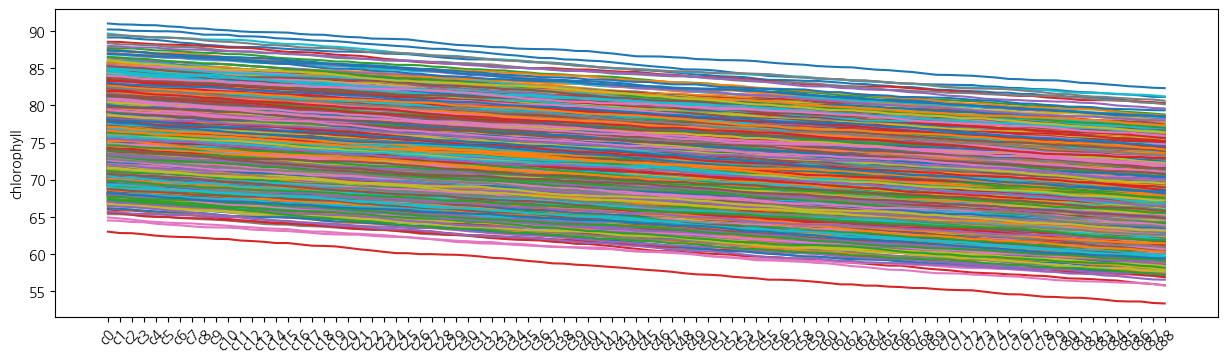

In [19]:
plt.figure(figsize=(15, 4))
for i in chlorophyll.index:
    sns.lineplot(data=chlorophyll.loc[i])
plt.ylabel('chlorophyll')
plt.xticks(rotation=45)
plt.show()

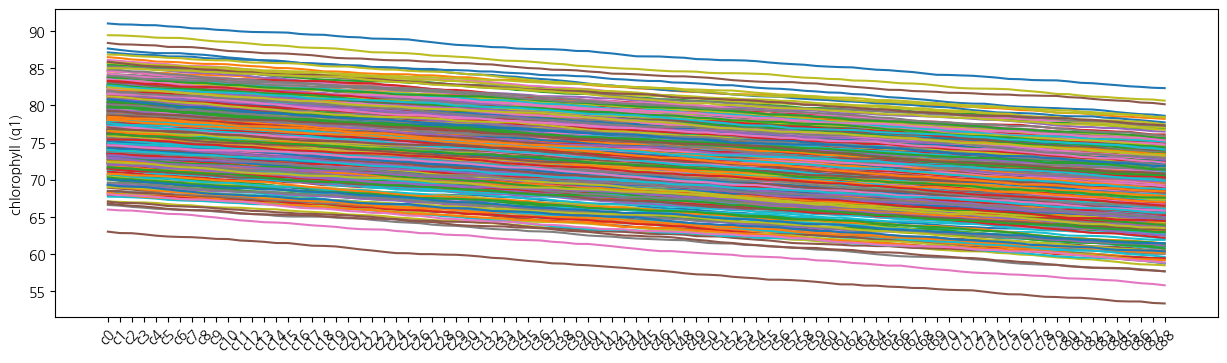

In [20]:
plt.figure(figsize=(15, 4))
for i in q1.index:
    sns.lineplot(data=chlorophyll.loc[i])
plt.ylabel('chlorophyll (q1)')
plt.xticks(rotation=45)
plt.show()

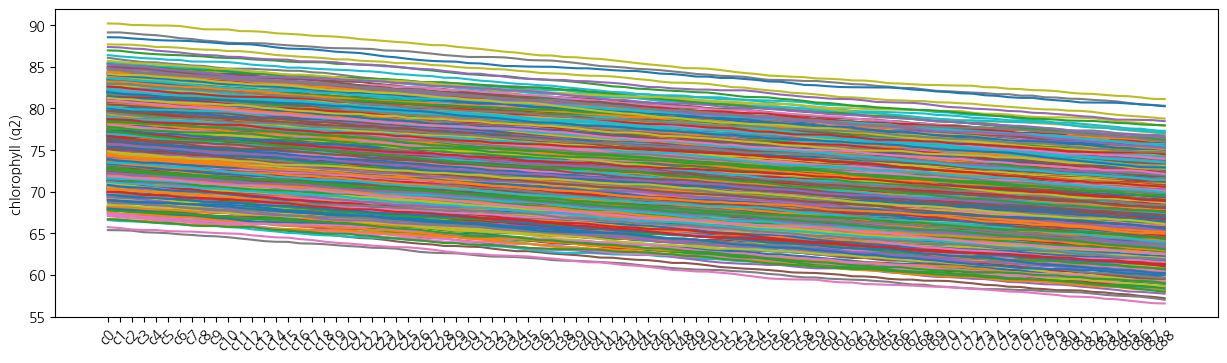

In [21]:
plt.figure(figsize=(15, 4))
for i in q2.index:
    sns.lineplot(data=chlorophyll.loc[i])
plt.ylabel('chlorophyll (q2)')
plt.xticks(rotation=45)
plt.show()

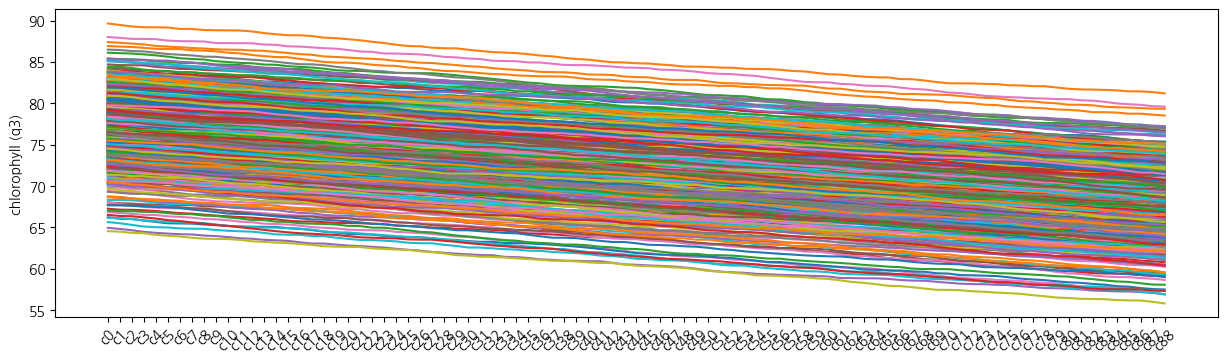

In [22]:
plt.figure(figsize=(15, 4))
for i in q3.index:
    sns.lineplot(data=chlorophyll.loc[i])
plt.ylabel('chlorophyll (q3)')
plt.xticks(rotation=45)
plt.show()

### sprout: 분위별 경향성 존재 (target 값 높은 군일수록 sprout 낮음)

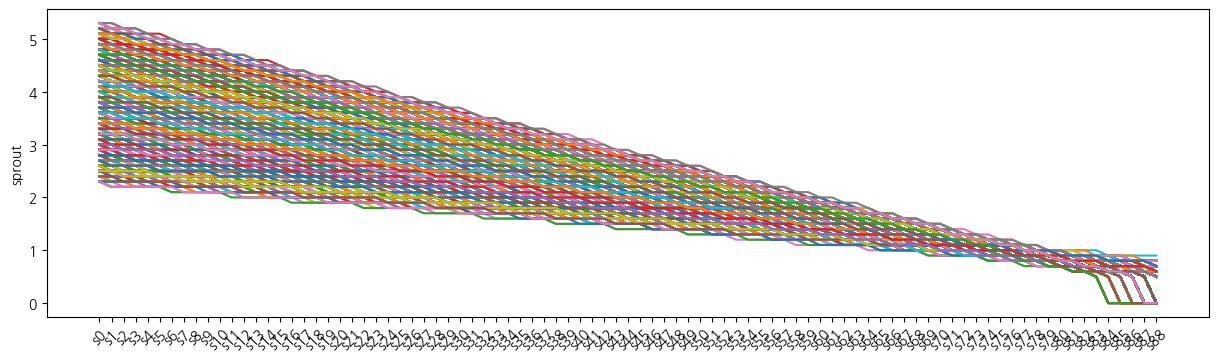

In [23]:
plt.figure(figsize=(15, 4))
for i in sprout.index:
    sns.lineplot(data=sprout.iloc[i])
plt.ylabel('sprout')
plt.xticks(rotation=45)
plt.show()

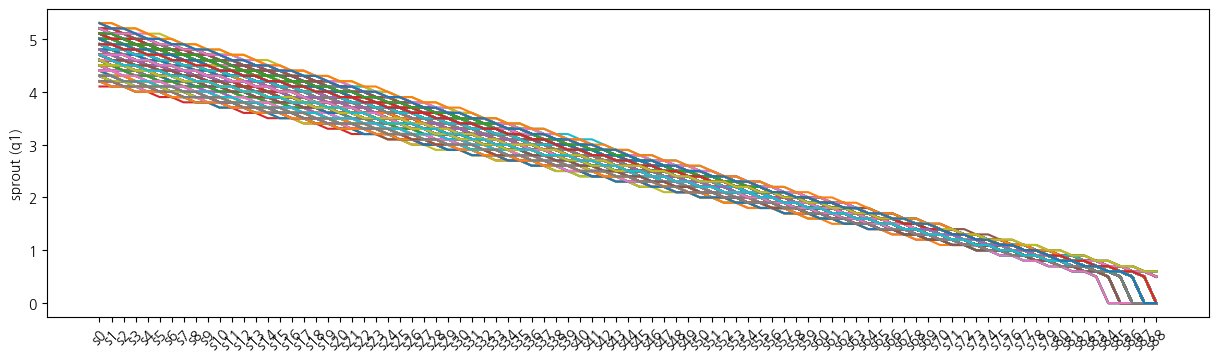

In [24]:
plt.figure(figsize=(15, 4))
for i in q1.index:
    sns.lineplot(data=sprout.loc[i])
plt.ylabel('sprout (q1)')
plt.xticks(rotation=45)
plt.show()

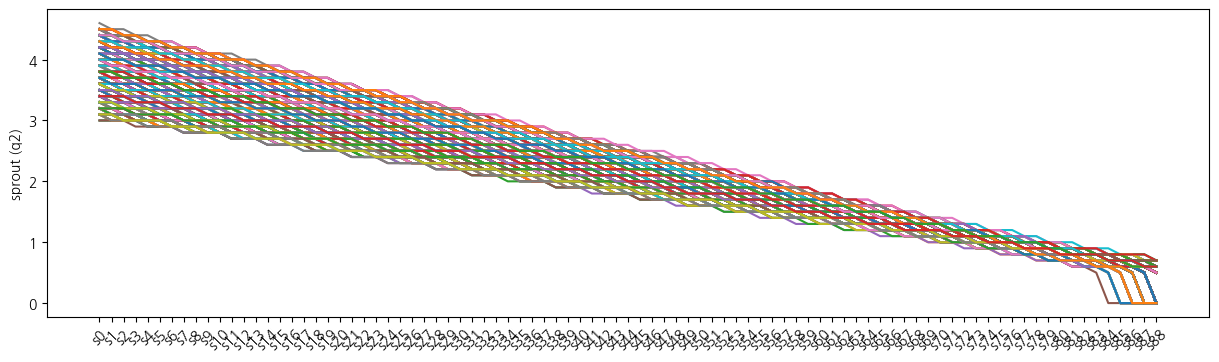

In [25]:
plt.figure(figsize=(15, 4))
for i in q2.index:
    sns.lineplot(data=sprout.loc[i])
plt.ylabel('sprout (q2)')
plt.xticks(rotation=45)
plt.show()

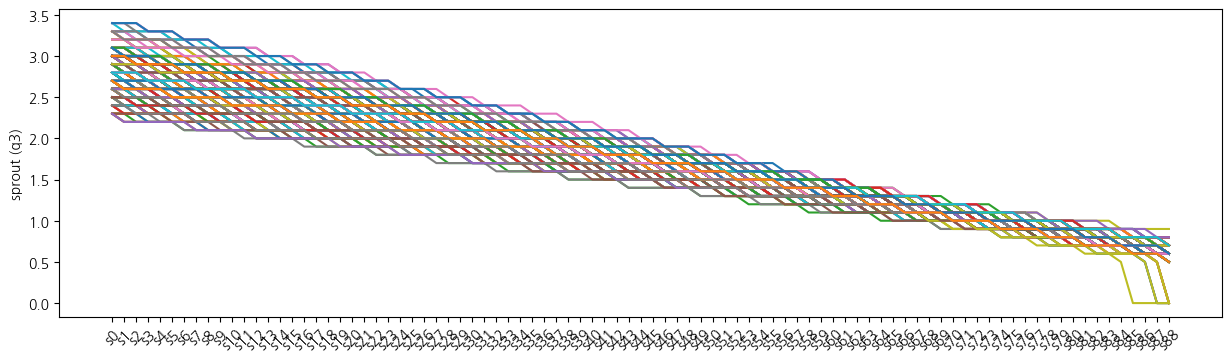

In [26]:
plt.figure(figsize=(15, 4))
for i in q3.index:
    sns.lineplot(data=sprout.loc[i])
plt.ylabel('sprout (q3)')
plt.xticks(rotation=45)
plt.show()

## 이외 컬럼(other_col: 수고, 수관폭min, 수관폭max, 수관폭avg) 상관분석 결과 target과의 상관성 매우 낮음

In [27]:
other_col

,target,수고,수관폭min,수관폭max,수관폭avg
0,692,275.0,287.0,292.0,289.5
1,534,293.0,284.0,336.0,310.0
2,634,300.0,392.0,450.0,421.0
3,639,289.0,368.0,379.0,373.5
4,496,306.0,353.0,358.0,355.5
...,...,...,...,...,...
2202,119,230.0,353.0,367.0,360.0
2203,611,266.0,337.0,400.0,368.5
2204,650,237.0,353.0,362.0,357.5
2205,363,281.0,337.0,403.0,370.0


<AxesSubplot: >

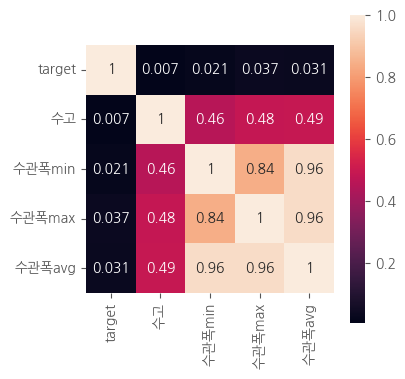

In [28]:
plt.style.use('ggplot')
corrMatt = other_col.corr()
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
sns.heatmap(corrMatt, annot=True, square=True)

# Feature Engineering

In [29]:
# 30+31+28

In [30]:
#monthly chlorophyll growth
train['cg9']=(train['c29']-train['c0'])/train['c0']*100
train['cg10']=(train['c60']-train['c30'])/train['c30']*100
train['cg11']=(train['c88']-train['c61'])/train['c61']*100
#monthly sprout growth
train['sg9']=(train['s29']-train['s0'])/train['s0']*100
train['sg10']=(train['s60']-train['s30'])/train['s30']*100
train['sg11']=(train['s88']-train['s61'])/train['s61']*100

In [31]:
#monthly mean chlorophyll
train['cm9']=chlorophyll.iloc[:,0:30].T.sum()/30
train['cm10']=chlorophyll.iloc[:,30:61].T.sum()/31
train['cm11']=chlorophyll.iloc[:,61:89].T.sum()/28
#monthly mean sprout
train['sm9']=sprout.iloc[:,0:30].T.sum()/30
train['sm10']=sprout.iloc[:,30:61].T.sum()/31
train['sm11']=sprout.iloc[:,61:89].T.sum()/28

In [32]:
train['ratio'] = train['수고']/train['수관폭avg']

In [33]:
train1=train
train2=train[['target','ratio','cg9','cg10','cg11','sg9','sg10','sg11','cm9','cm10','cm11','sm9','sm10','sm11']]

<AxesSubplot: >

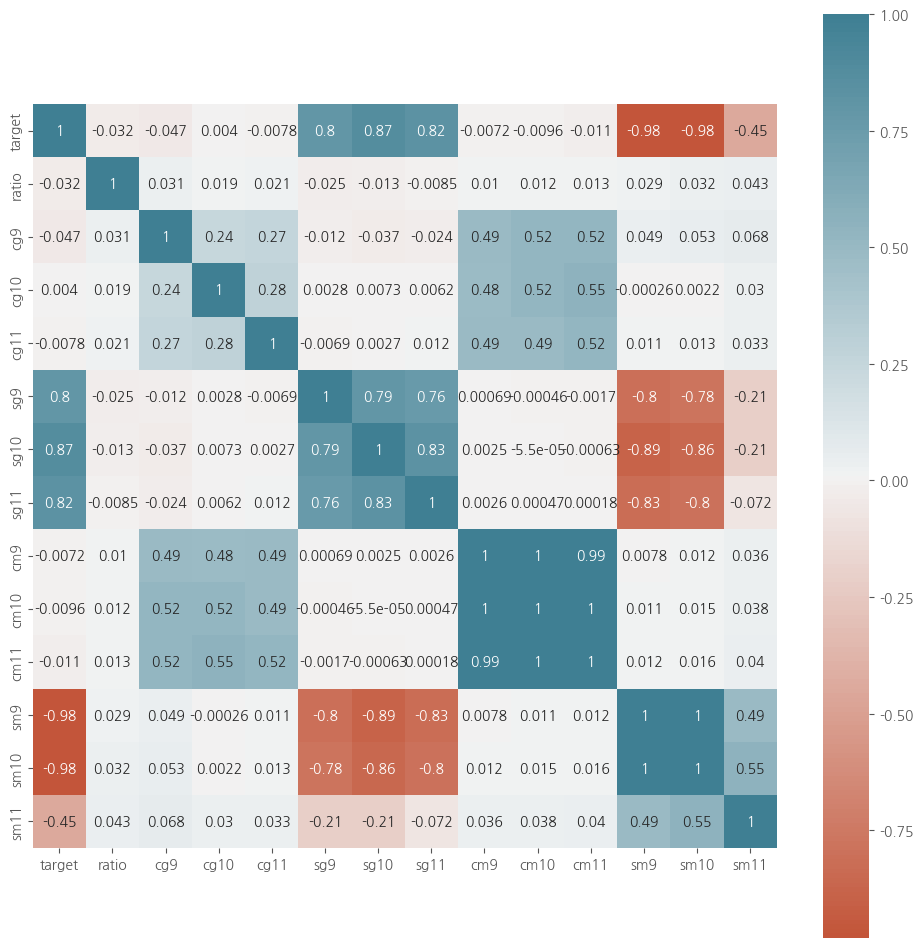

In [ ]:
corrMatt = train2.corr()
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrMatt,annot=True, square=True, cmap =sns.diverging_palette(20, 220, n=200))

# Modeling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

c:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [35]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [61]:
def print_predictions(target,predictions):
    print('*** NMAE***: '+str(NMAE(target,predictions)))
    print('mean_absolute_error: '+str(mean_absolute_error(target,predictions)))
    print('mean_squared_error: '+str(mean_squared_error(target,predictions)))
    print('r2_score: '+str(r2_score(target,predictions)))

In [48]:
estimators=[
    ('linear',LinearRegression()),
    ('elasticnet',SGDRegressor(penalty='elasticnet')),
    ('gb',GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                max_depth=7, min_samples_leaf=15, min_samples_split=10)),
    ('random_forest',RandomForestRegressor()),
    ('xgb',XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,
                        colsample_bytree=1, max_depth=7)),
    ('svr',SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)), #Radial Basis Function
    ('deep_nn',MLPRegressor(hidden_layer_sizes=(512,256,128,64,32,16,8), max_iter=5000, alpha=0.005, random_state=42, activation='identity')),
    ('knn',KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='auto'))]

## select train dataset

### train0: original data / train1: original data + 파생변수 / train2: 파생변수

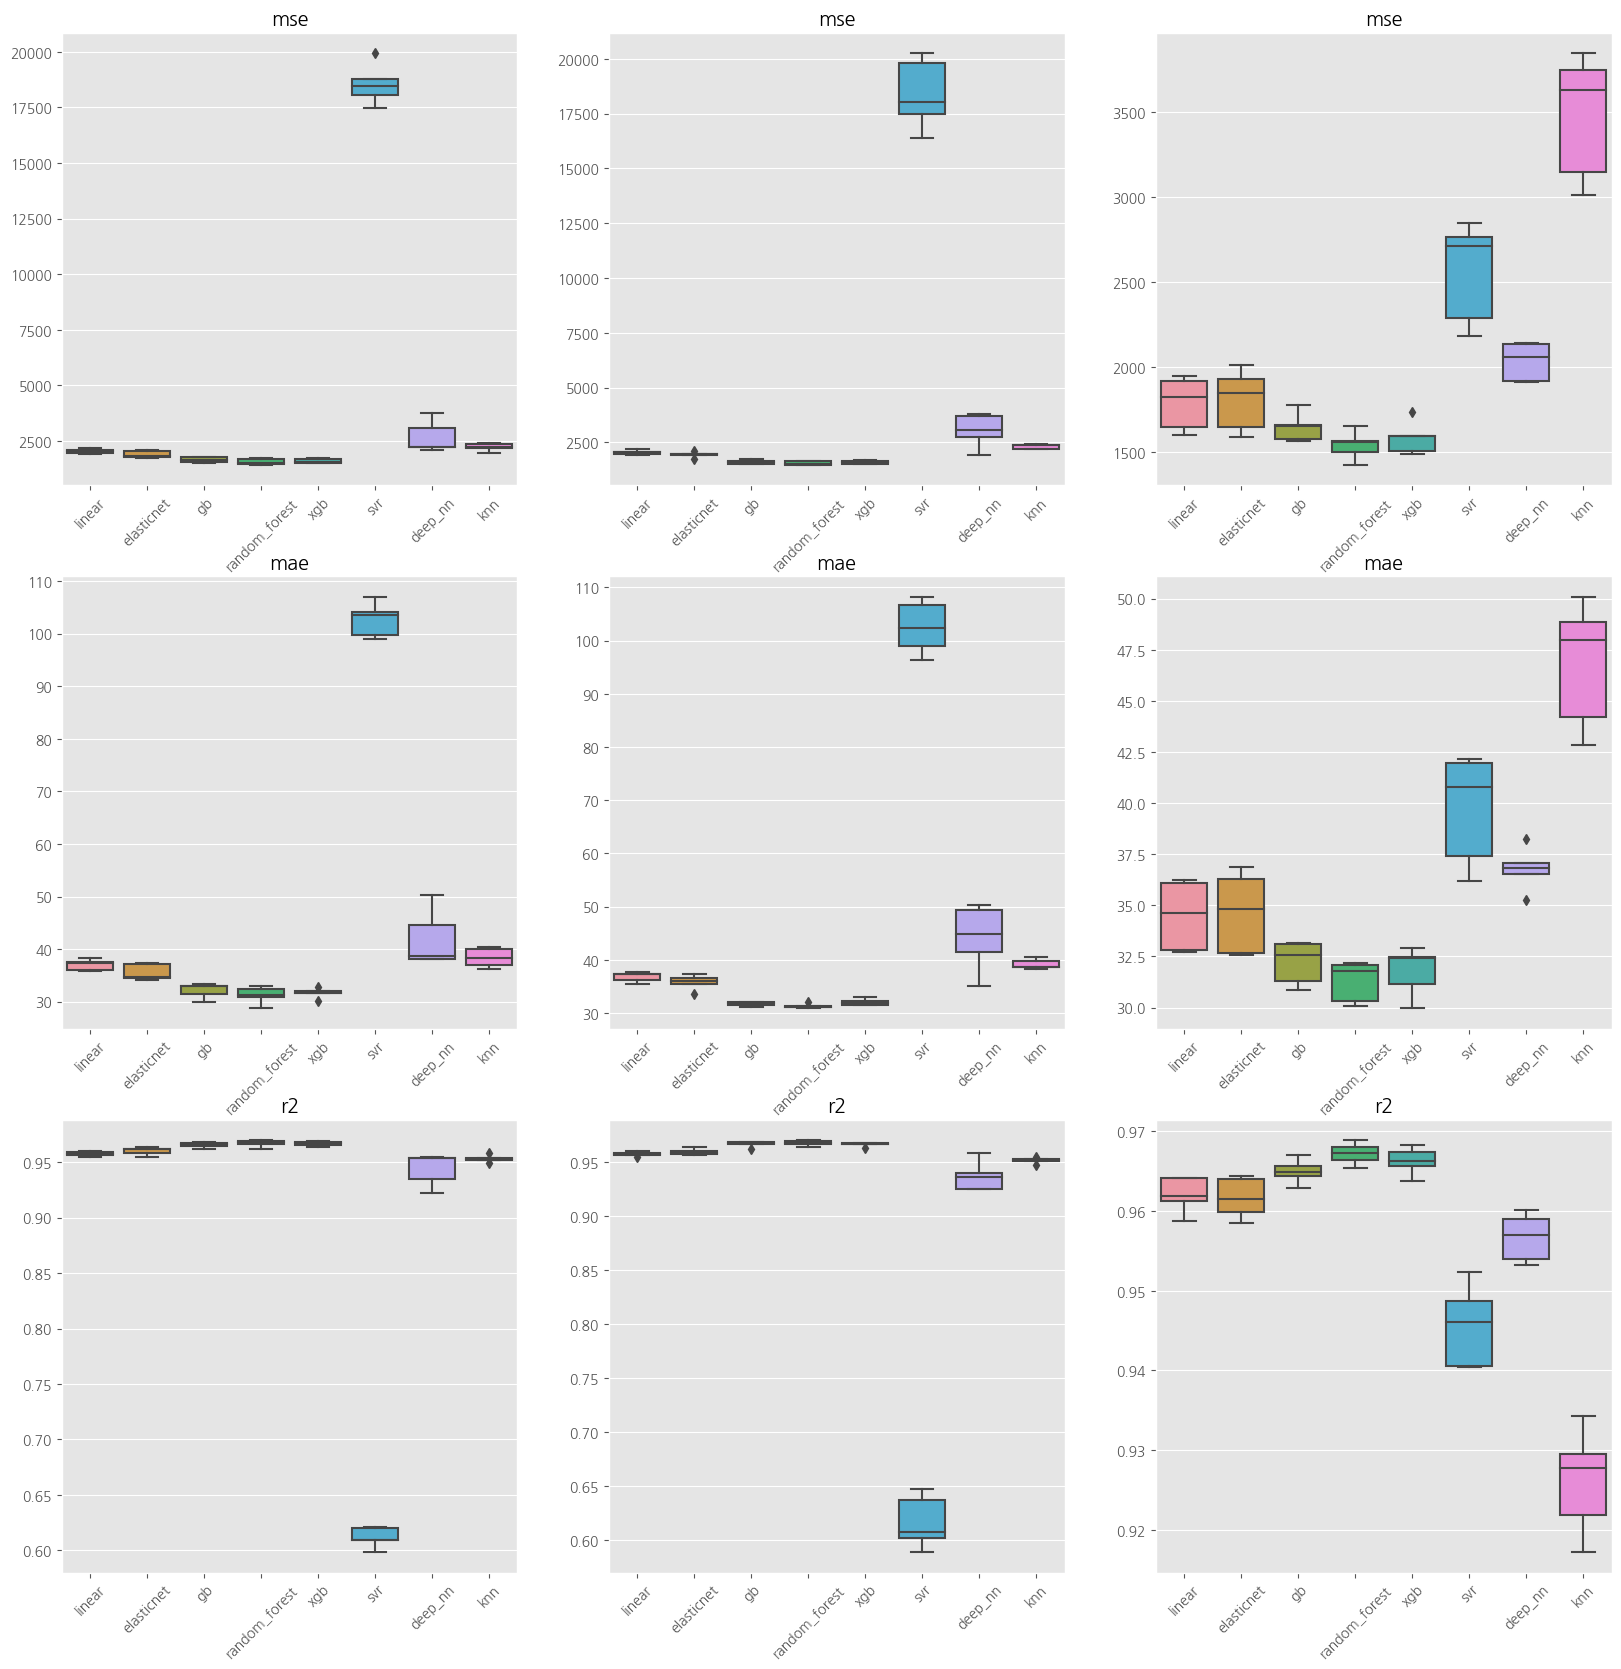

In [54]:
plt.style.use('ggplot')
fig, axs = plt.subplots(3,3, figsize=(20,20))
col=0

for t in [train0, train1,train2]:
    Y = t['target']
    X = t[t.columns.difference(['target'])]
    data, eval_data, target, eval_target = train_test_split(X,Y,test_size=.20)

    pipes={}
    for model in estimators:
        pipe=Pipeline(steps=[('scaler',StandardScaler()), model])
        pipe.fit(data,target)
        pipes[pipe.steps[1][0]]=pipe

    ### Initial Model Scoring
    _metrics={'mse':make_scorer(mean_squared_error),'mae':make_scorer(mean_absolute_error),'r2':make_scorer(r2_score)} # 'msle':make_scorer(mean_squared_log_error),

    estimator_names=[model[0] for model in estimators]

    def plot_estimators(col, estimators=estimator_names,n_splits=5,metrics=['mse','mae','r2']):
        metrics={key : _metrics[key] for key in metrics}
        scorers=[]
        labels=[]
        for pipe_name in pipes.keys():
            if pipe_name in estimators:
                pipe=pipes[pipe_name]
                labels.append(pipe_name)
                kf=KFold(n_splits)
                model_score=cross_validate(pipe,data,target,scoring=metrics,cv=kf)
                scorers.append(model_score)
        
        score_lists={}
        for metric in metrics:
            score_lists[metric]=[score['test_'+metric] for score in scorers]
        for  i,(title, _list) in enumerate(score_lists.items()):
            sns.boxplot(data=_list, ax=axs[i, col])
            axs[i, col].set_xticklabels(labels, rotation=45)
            axs[i, col].set_title(title)
            
    metrics={'mse':make_scorer(mean_squared_error),'mae':make_scorer(mean_absolute_error),'r2':make_scorer(r2_score)}
    plot_estimators(col)
    col+=1

⭐⭐ 파생변수로 만든 train2를 학습한 결과 상대적으로 성능이 좋음

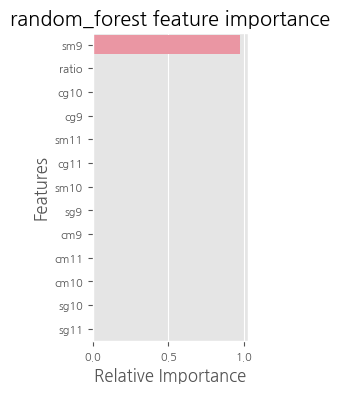

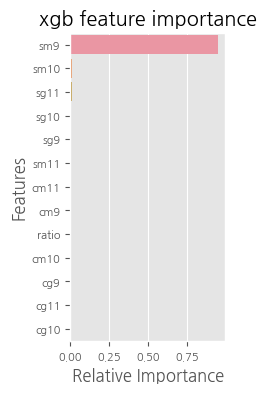

In [58]:
tree_based=['random_forest','xgb']
for name in pipes.keys(): 
    if name in tree_based:
        feat_impt=pipes[name].named_steps[name].feature_importances_
        graph_data=pd.DataFrame()

        graph_data['feature']=data.columns.values
        graph_data['importance']=feat_impt
        graph_data_top=graph_data.nlargest(30,'importance')

        plt.figure(figsize=(2,4))
        g=sns.barplot(y='feature',x='importance',data=graph_data_top,orient='h')
        g.set_ylabel('Features',fontsize=12)
        g.set_xlabel('Relative Importance')
        g.set_title(name + " feature importance")
        g.tick_params(labelsize=8)

In [96]:
from sklearn import metrics
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

## Ensemble

In [101]:
from sklearn.ensemble import VotingRegressor
from sklearn.base import clone

estimators=[(pipe.steps[1][0],clone(pipe.steps[1][1])) for pipe in pipes.values()] 
vote=Pipeline(steps=[('scaler',StandardScaler()), ('voter',VotingRegressor(estimators))])
vote.fit(data,target)

Pipeline(steps=[('scaler', StandardScaler()),
                ('voter',
                 VotingRegressor(estimators=[('linear', LinearRegression()),
                                             ('elasticnet',
                                              SGDRegressor(penalty='elasticnet')),
                                             ('gb',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=7,
                                                                        min_samples_leaf=15,
                                                                        min_samples_split=10,
                                                                        n_estimators=200)),
                                             ('random_forest',
                                              RandomForestRegressor()),
                                             ('xgb',
                                              XGBRegressor(base...
                                                           random_state=0,
                                                           reg_alpha=0,
                                                           reg_lambda=1,
                                                           scale_pos_weight=1,
                                                           subsample=0.75,
                                                           tree_method='exact',
                                                           validate_parameters=1,
                                                           verbosity=None)),
                                             ('svr', SVR(C=100, gamma=0.1)),
                                             ('deep_nn',
                                              MLPRegressor(activation='identity',
                                                           alpha=0.005,
                                                           hidden_layer_sizes=(512,
                                                                               256,
                                                                               128,
                                                                               64,
                                                                               32,
                                                                               16,
                                                                               8),
                                                           max_iter=5000,
                                                           random_state=42)),
                                             ('knn',
                                              KNeighborsRegressor(n_neighbors=10,
                                                                  weights='distance'))]))])

In [102]:
predictions=vote.predict(eval_data)
print_predictions(eval_target,predictions)

*** NMAE***: 0.3848132763560178
mean_absolute_error: 33.232470498053125
mean_squared_error: 1713.8987766242508
r2_score: 0.9656096807912352


In [103]:
for name in pipes.keys():
    print(name)
    predictions=pipes[name].predict(eval_data)
    print_predictions(eval_target,predictions)
    print()

linear
*** NMAE***: 0.37748464418637934
mean_absolute_error: 34.35233900108174
mean_squared_error: 1795.2320326235476
r2_score: 0.9639776843896665

elasticnet
*** NMAE***: 0.39331775019235615
mean_absolute_error: 34.633960660104364
mean_squared_error: 1822.436235399448
r2_score: 0.9634318171365689

gb
*** NMAE***: 0.23403437966147037
mean_absolute_error: 19.292182688516323
mean_squared_error: 680.0378838351107
r2_score: 0.9863546667877285

random_forest
*** NMAE***: 0.2074888403962361
mean_absolute_error: 16.305633484162897
mean_squared_error: 519.3412255656109
r2_score: 0.9895791333951176

xgb
*** NMAE***: 0.20616115119063513
mean_absolute_error: 20.63438717164605
mean_squared_error: 709.9067583740641
r2_score: 0.9857553314338494

svr
*** NMAE***: 0.4345398381368298
mean_absolute_error: 32.04291036022846
mean_squared_error: 1823.6642858793466
r2_score: 0.9634071756299734

deep_nn
*** NMAE***: 0.3875600852313238
mean_absolute_error: 35.11058604853523
mean_squared_error: 1855.8295005271

In [104]:
del pipes['svr'], pipes['elasticnet']

In [106]:
from itertools import combinations

final_estimators=pipes.keys()

combos=[]
for L in range(2, len(final_estimators)+1):
    for subset in combinations(final_estimators, L):
        combos.append(list(subset))

combo_names=[]
mae=[]
mse=[]
r2=[]

for combo in combos:
    estimators=[(name,clone(pipes[name].named_steps[name])) for name in combo] 
    vote=Pipeline(steps=[('scaler',StandardScaler()), ('voter',VotingRegressor(estimators))])
    vote.fit(data,target)
    predictions=vote.predict(eval_data)

    mae.append(mean_absolute_error(eval_target,predictions))
    mse.append(mean_squared_error(eval_target,predictions))
    r2.append(r2_score(eval_target,predictions))
    combo_names.append(str(list(combo)))
    
score=pd.DataFrame()
score['combo']=combo_names
score['mae']=mae
score['mse']=mse
score['r2']=r2

score

,combo,mae,mse,r2
0,"['linear', 'gb']",32.311854,1640.661994,0.967079
1,"['linear', 'random_forest']",32.149466,1615.494970,0.967584
2,"['linear', 'xgb']",32.090903,1599.929717,0.967897
3,"['linear', 'deep_nn']",34.441463,1816.734558,0.963546
4,"['linear', 'knn']",38.032612,2254.474439,0.954763
5,"['gb', 'random_forest']",32.625713,1712.508789,0.965638
6,"['gb', 'xgb']",32.250506,1680.037323,0.966289
7,"['gb', 'deep_nn']",32.302085,1643.271520,0.967027
8,"['gb', 'knn']",36.353827,2108.009698,0.957702
9,"['random_forest', 'xgb']",32.133162,1638.907739,0.967114


In [111]:
score[score['mse']<1596]

,combo,mae,mse,r2
12,"['xgb', 'deep_nn']",31.918411,1591.063854,0.968074
19,"['linear', 'random_forest', 'xgb']",31.828602,1585.582365,0.968184
31,"['random_forest', 'xgb', 'deep_nn']",31.828761,1581.337886,0.968270
41,"['linear', 'random_forest', 'xgb', 'deep_nn']",31.985096,1595.113627,0.967993
45,"['gb', 'random_forest', 'xgb', 'deep_nn']",31.783483,1595.930194,0.967977
50,"['linear', 'gb', 'random_forest', 'xgb', 'deep...",31.829791,1590.044290,0.968095


In [ ]:
pipes_or = pipes

In [116]:
del pipes['gb'], pipes['deep_nn'], pipes['knn']

In [121]:
final_estimators=[(pipe.steps[1][0],clone(pipe.steps[1][1])) for pipe in pipes.values()] 
final_vote=Pipeline(steps=[('scaler',StandardScaler()), ('voter',VotingRegressor(final_estimators))])
final_vote.named_steps

{'scaler': StandardScaler(),
 'voter': VotingRegressor(estimators=[('linear', LinearRegression()),
                             ('random_forest', RandomForestRegressor()),
                             ('xgb',
                              XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.05, max_delta_step=0,
                                           max_depth=7, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                

In [122]:
Y = train2['target']
X = train2[train2.columns.difference(['target'])]

data, eval_data, target, eval_target = train_test_split(X,Y,test_size=.20)
final_vote.fit(data,target)
predictions=final_vote.predict(eval_data)

print_predictions(eval_target,predictions)

*** NMAE***: 0.24619137365699498
mean_absolute_error: 29.4892167650021
mean_squared_error: 1345.0011834892882
r2_score: 0.9715211284989749


# Final estimation

In [123]:
test

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.0,265.0,288.0,276.5,2.5,2.5,2.4,2.4,2.4,...,70.567966,70.528762,70.333905,70.245126,70.186665,70.010219,69.916747,69.771722,69.737748,69.601365
2204,TEST_2204,182.0,191.0,262.0,226.5,4.1,4.1,4.1,4.0,4.0,...,66.545938,66.485657,66.408375,66.255137,66.206650,66.079592,65.951010,65.884988,65.719787,65.632342
2205,TEST_2205,254.0,280.0,332.0,306.0,3.8,3.8,3.8,3.7,3.7,...,63.254101,63.134023,63.035379,62.877995,62.681351,62.499735,62.421901,62.417195,62.323963,62.307955
2206,TEST_2206,257.0,285.0,297.0,291.0,4.5,4.4,4.4,4.3,4.3,...,64.331650,64.137868,64.045153,63.944310,63.916583,63.797809,63.762720,63.681733,63.512114,63.343589


In [124]:
cols = ['id','수고','수관폭min','수관폭max','수관폭avg']
for i in range(89):
    cols.append('s{}'.format(i))
for i in range(89):
    cols.append('c{}'.format(i))
len(cols)

183

In [125]:
test.columns=cols
test=test.drop('id', axis=1)
test.head(2)

,수고,수관폭min,수관폭max,수관폭avg,s0,s1,s2,s3,s4,s5,...,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88
0,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,2.4,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849


In [132]:
#monthly chlorophyll growth
test['cg9']=(test['c29']-test['c0'])/test['c0']*100
test['cg10']=(test['c60']-test['c30'])/test['c30']*100
test['cg11']=(test['c88']-test['c61'])/test['c61']*100
#monthly sprout growth
test['sg9']=(test['s29']-test['s0'])/test['s0']*100
test['sg10']=(test['s60']-test['s30'])/test['s30']*100
test['sg11']=(test['s88']-test['s61'])/test['s61']*100

In [127]:
chlorophyll_col = []
sprout_col = []
col_else = []
for col in test.columns:
    if 's' in col:
        sprout_col.append(col)
    elif 'c' in col:
        chlorophyll_col.append(col)
    else:
        col_else.append(col)

In [128]:
chlorophyll=test[chlorophyll_col]
sprout=test[sprout_col]

In [129]:
#monthly mean chlorophyll
test['cm9']=chlorophyll.iloc[:,0:30].T.sum()/30
test['cm10']=chlorophyll.iloc[:,30:61].T.sum()/31
test['cm11']=chlorophyll.iloc[:,61:89].T.sum()/28
#monthly mean sprout
test['sm9']=sprout.iloc[:,0:30].T.sum()/30
test['sm10']=sprout.iloc[:,30:61].T.sum()/31
test['sm11']=sprout.iloc[:,61:89].T.sum()/28

In [130]:
test['ratio'] = test['수고']/test['수관폭avg']

In [133]:
test1=test
test2=test[['ratio','cg9','cg10','cg11','sg9','sg10','sg11','cm9','cm10','cm11','sm9','sm10','sm11']]

In [138]:
test2.columns=['cg10', 'cg11', 'cg9', 'cm10', 'cm11', 'cm9', 'ratio', 'sg10', 'sg11',
       'sg9', 'sm10', 'sm11', 'sm9']

In [140]:
final_vote.fit(X,Y)
pred = final_vote.predict(test2)
submission = pd.read_csv('./sample_submission.csv')
submission['착과량(int)'] = pred
submission

,ID,착과량(int)
0,TEST_0000,1115.097209
1,TEST_0001,1021.385959
2,TEST_0002,1130.383641
3,TEST_0003,1124.822846
4,TEST_0004,1009.277044
...,...,...
2203,TEST_2203,1001.992331
2204,TEST_2204,1132.881478
2205,TEST_2205,1051.819416
2206,TEST_2206,1130.557454


In [141]:
submission.to_csv('./sample_submission.csv', index=False)